In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from persistent_cost.cone_gd import cone_pipeline
from persistent_cost.utils.output import print_diagram_stats, plot_diagrams
from persistent_cost.utils.utils import compute_lipschitz_constant
from tadasets import torus
from scipy.spatial.distance import squareform, pdist

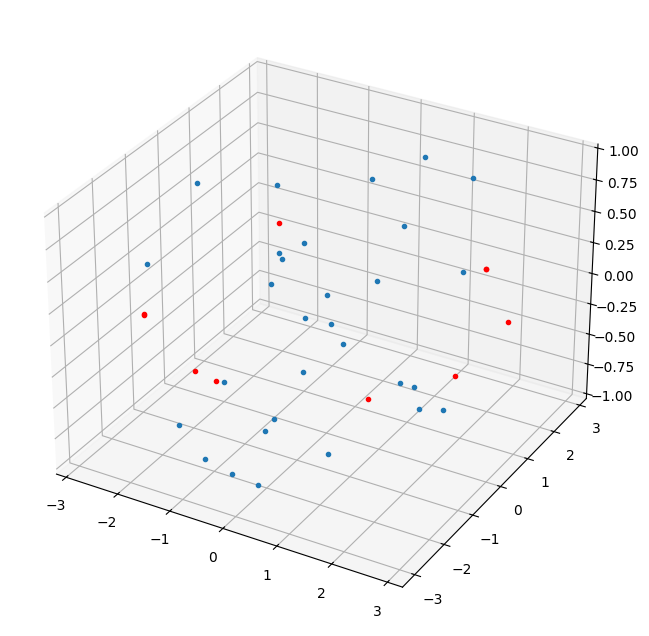

In [3]:
np.random.seed(42)
T = 30
C = 10
torus = torus(T,seed=42)
# proy = torus[:, :2]
# draw 3d axis square
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(torus[:,0], torus[:,1], torus[:,2],'.');

ph = np.random.uniform(0, 2*np.pi, C)
circle = 3*np.array([np.cos(ph), np.sin(ph), np.zeros_like(ph)]).T
ax.plot(circle[:,0], circle[:,1], circle[:,2], 'r.', lw=3);

In [4]:
Y = np.r_[circle, torus]
# X = circle
f = np.arange(len(circle))
dY = pdist(Y)
DY = squareform(dY)
DX = DY[:len(circle), :len(circle)]
dX = squareform(DX)
dY = squareform(DY)


((20, 3), (20, 2), (20,))

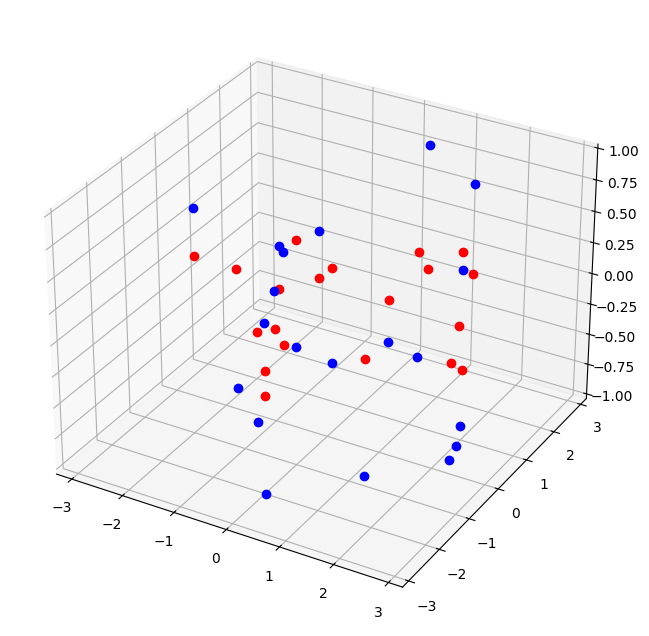

In [5]:
from persistent_cost.utils.generate_spaces import toro_proyecta

X, Y, f = toro_proyecta(20, seed=42)
dX = pdist(X)
dY = pdist(Y)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(Y[:,0], Y[:,1],'ro');
ax.plot(X[:,0], X[:,1], X[:,2], 'ob');

X.shape, Y.shape, f.shape

In [6]:


print(len(f), len(Y))

maxdim = 2

L = compute_lipschitz_constant(dX, dY, f)    
print("Initial Lipschitz L:", L)
dY = dY

20 20
Initial Lipschitz L: 0.9999992528837333


In [7]:
dgm_coker, dgm_ker, dgm_cone, dgm_X, dgm_Y, Dcone, missing = cone_pipeline(
    dX, dY, f, maxdim, cone_eps=0.0, return_extra=True)

print("Cone persistence diagram:")
print_diagram_stats(dgm_cone)
print("Kernel persistence diagram:")
print_diagram_stats(dgm_ker)
print("Cokernel persistence diagram:")
print_diagram_stats(dgm_coker)

Cone persistence diagram:
Dimension 0:
  Total points: 1
  Finite points: 0
  Infinite points: 1
  Average lifetime (finite): nan
  Max lifetime (finite): nan

Dimension 1:
  Total points: 23
  Finite points: 23
  Infinite points: 0
  Average lifetime (finite): 0.2731
  Max lifetime (finite): 0.8420

Dimension 2:
  Total points: 3
  Finite points: 3
  Infinite points: 0
  Average lifetime (finite): 0.1555
  Max lifetime (finite): 0.1949

Kernel persistence diagram:
Dimension 0:
  Total points: 16
  Finite points: 16
  Infinite points: 0
  Average lifetime (finite): 0.3117
  Max lifetime (finite): 0.8420

Dimension 1:
  Total points: 3
  Finite points: 3
  Infinite points: 0
  Average lifetime (finite): 0.1555
  Max lifetime (finite): 0.1949

Cokernel persistence diagram:
Dimension 0:
  Total points: 1
  Finite points: 0
  Infinite points: 1
  Average lifetime (finite): nan
  Max lifetime (finite): nan

Dimension 1:
  Total points: 1
  Finite points: 1
  Infinite points: 0
  Average lif

In [12]:
dgm_coker, dgm_ker

([array([[ 0., inf]]), array([[0.77563815, 0.84974638]])],
 [array([[0.27107363, 0.42862123],
         [0.52311988, 0.67012109],
         [0.75505248, 0.75551989],
         [0.76418883, 0.81014723],
         [0.75648723, 1.0518337 ],
         [0.29182905, 1.08286213],
         [0.63061923, 1.16807479],
         [1.17771232, 1.18298232],
         [1.17388192, 1.19051943],
         [0.37857783, 1.22062426],
         [0.8498521 , 1.26504949],
         [1.31195864, 1.31261124],
         [1.39252312, 1.40282742],
         [1.38205538, 1.50186277],
         [0.74915855, 1.58051314],
         [0.86198911, 1.63376976]]),
  array([[1.71839525, 1.91332164],
         [1.80218792, 1.97647389],
         [2.07716466, 2.17440836]])])

([array([[ 0., inf]]), array([[0.77563815, 0.84974638]])],
 [array([[0.27107363, 0.42862123],
         [0.52311988, 0.67012109],
         [0.75505248, 0.75551989],
         [0.76418883, 0.81014723],
         [0.75648723, 1.0518337 ],
         [0.29182905, 1.08286213],
         [0.63061923, 1.16807479],
         [1.17771232, 1.18298232],
         [1.17388192, 1.19051943],
         [0.37857783, 1.22062426],
         [0.8498521 , 1.26504949],
         [1.31195864, 1.31261124],
         [1.39252312, 1.40282742],
         [1.38205538, 1.50186277],
         [0.74915855, 1.58051314],
         [0.86198911, 1.63376976]]),
  array([[1.71839525, 1.91332164],
         [1.80218792, 1.97647389],
         [2.07716466, 2.17440836]])])

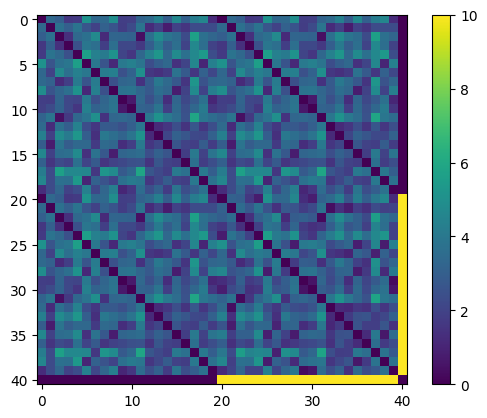

In [9]:
plt.imshow(Dcone, vmax=10, interpolation='none')
plt.colorbar();

In [10]:
missing

[[],
 [('null', (np.float64(1.3896050678595913), np.float64(1.3932164101774254))),
  ('null', (np.float64(1.007740905418012), np.float64(1.4327650916061954))),
  ('null', (np.float64(1.4258930646017545), np.float64(1.5621816806642967))),
  ('null', (np.float64(1.567623331066218), np.float64(1.5706596144184815))),
  ('null', (np.float64(1.2204143843246904), np.float64(1.6192735367622977))),
  ('null', (np.float64(1.3810941507922494), np.float64(1.6334167761771552)))],
 []]

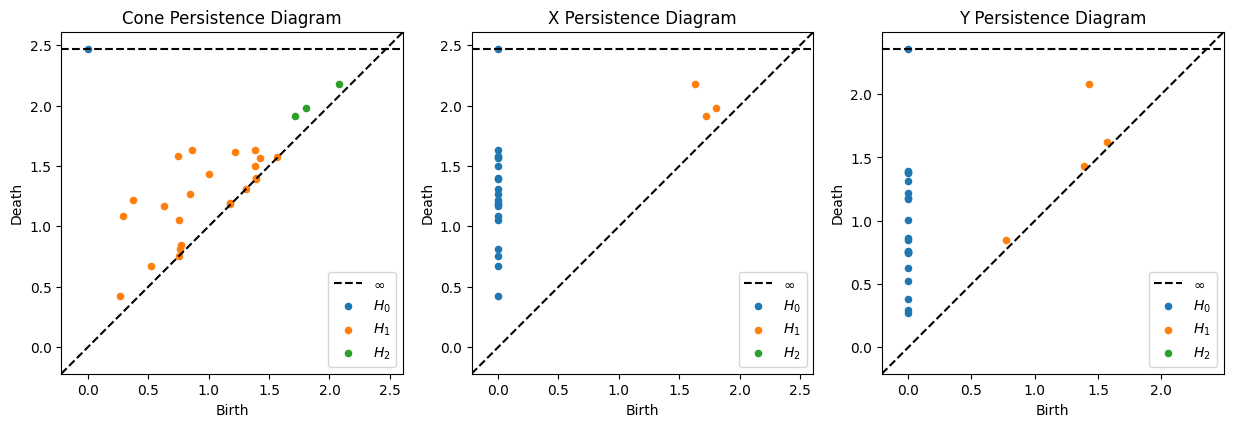

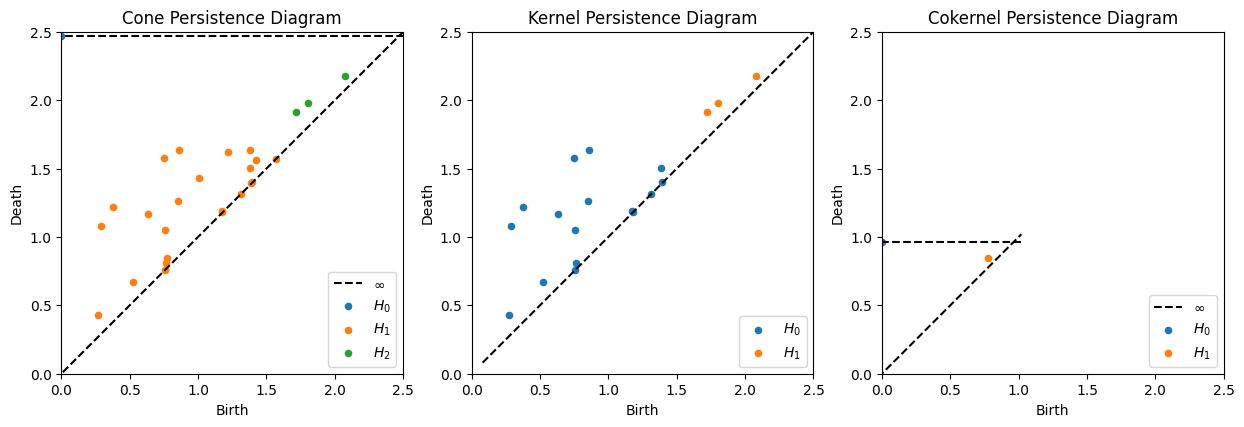

In [11]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
if dgm_cone: plot_diagrams(dgm_cone, ax=ax[0], title="Cone Persistence Diagram")
if dgm_X: plot_diagrams(dgm_X, ax=ax[1], title="X Persistence Diagram")
if dgm_Y: plot_diagrams(dgm_Y, ax=ax[2], title="Y Persistence Diagram")

fig, ax = plt.subplots(1,3, figsize=(15,5))
if dgm_cone: plot_diagrams(dgm_cone, ax=ax[0], title="Cone Persistence Diagram")
if dgm_ker: plot_diagrams(dgm_ker, ax=ax[1], title="Kernel Persistence Diagram")
if dgm_coker: plot_diagrams(dgm_coker, ax=ax[2], title="Cokernel Persistence Diagram")
for a in ax:
    a.set_xlim(0,2.5)
    a.set_ylim(0,2.5)